In [1]:
library(dplyr)
library(dtplyr)
library(tidyr)
library(data.table)
library(tibble)
library(ggplot2)
library(hrbrthemes)
library(ggthemr)
library(viridis)
library(cowplot)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last


Attaching package: ‘ggplot2’

The following object is masked from ‘package:dplyr’:

    vars

Loading required package: viridisLite

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [3]:
fl = "~/PROJECTS/target_infect_x_project/src/tix-analysis/data/kmeans-transformed-bic.tsv"
gene.pred.file = "~/PROJECTS/target_infect_x_project/src/tix-analysis/data/kmeans-transformed-statistics-gene_pathogen_prediction_counts.tsv"

In [19]:
cont <- readr::read_tsv(fl2, col_names=TRUE)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  gene = col_character(),
  pathogen = col_character(),
  prediction = col_integer(),
  count = col_integer()
)


In [15]:
library(extrafont)
font_import()

Registering fonts with R


Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in /Library/Fonts/, /System/Library/Fonts, ~/Library/Fonts/ ...
Extracting .afm files from .ttf files...
/Library/Fonts/Andale Mono.ttf => /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/metrics/Andale Mono
/Library/Fonts/Apple Chancery.ttf : No FontName. Skipping.
/Library/Fonts/AppleGothic.ttf : No FontName. Skipping.
/Library/Fonts/AppleMyungjo.ttf => /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/metrics/AppleMyungjo
/Library/Fonts/Arial Black.ttf => /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/metrics/Arial Black
/Library/Fonts/Arial Bold Italic.ttf => /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/metrics/Arial Bold Italic
/Library/Fonts/Arial Bold.ttf => /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/metrics/Arial Bold
/Library/Fonts/Arial Italic.ttf => /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extraf

/Library/Fonts/Microsoft/Cambria Math.ttf => /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/metrics/Cambria Math
/Library/Fonts/Microsoft/Cambria.ttf => /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/metrics/Cambria
/Library/Fonts/Microsoft/Candara Bold Italic.ttf => /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/metrics/Candara Bold Italic
/Library/Fonts/Microsoft/Candara Bold.ttf => /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/metrics/Candara Bold
/Library/Fonts/Microsoft/Candara Italic.ttf => /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/metrics/Candara Italic
/Library/Fonts/Microsoft/Candara.ttf => /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/metrics/Candara
/Library/Fonts/Microsoft/Consolas Bold Italic.ttf => /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/metrics/Consolas Bold Italic

In [8]:
dat <- data.table::fread(gene.pred.file, sep="\t", header=TRUE)

gene.pathogen.combinations <- group_by(dat, gene, pathogen) %>%
dplyr::summarize(n=n()) %>%
ungroup

dat <- dplyr::left_join(dat, gene.pathogen.combinations, by=c("gene", "pathogen"))
dat <- dplyr::mutate(dat, Frequency=count/n)

hs <- hist(dat$Frequency, breaks=300, plot=FALSE)
df <- data.frame(Frequency=hs$mids, Density=hs$counts/sum(hs$counts))
fre <- mean(dat$Frequency)

In [19]:
font_install("fontcm")

Package "fontcm" not installed. Would you like to install it from CRAN? [y/n] y


Attempting to install "fontcm" from CRAN...



The downloaded binary packages are in
	/var/folders/cx/v45t2v2n6b548_vfn76vnzlw0050sr/T//RtmpP8hrj4/downloaded_packages


Registering font package "fontcm" with fonts.
Importing type1 font from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/fontcm
Scanning afm files in /Library/Frameworks/R.framework/Versions/3.5/Resources/library/fontcm/fonts/metrics
Writing font table in /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/fontmap/fonttable.csv
Writing Fontmap to /Library/Frameworks/R.framework/Versions/3.5/Resources/library/extrafontdb/fontmap/Fontmap...


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Condensed Light' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Condensed Light' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Condensed Light' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Condensed Light' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Condensed Light' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Condensed Light' not found in PostScript

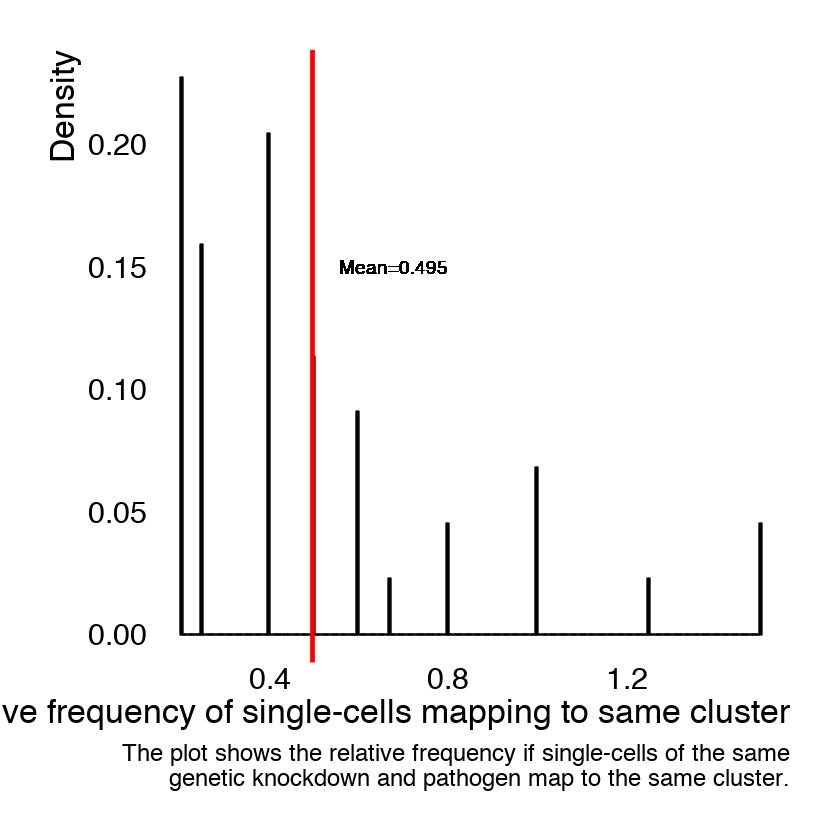

In [38]:

ggplot(df) +
geom_histogram(aes(x=Frequency, y=Density), stat="identity", color="black", alpha=.5) +
hrbrthemes::theme_ipsum_rc(base_family = "Helvetica") +
ylab("Density") +
xlab("Relative frequency of single-cells mapping to same cluster") +
labs(caption=paste("The plot shows the relative frequency if single-cells of the same",
                   "genetic knockdown and pathogen map to the same cluster.", sep="\n")) +
geom_vline(data=NULL, aes(xintercept=fre), color="red", lwd=1) +
geom_text(data=NULL, aes(x=fre, y=.15), label=paste0("Mean=", round(fre, 3)), hjust=-.25) +
ggplot2::theme(axis.text.x  = ggplot2::element_text( size=18, color="black"),
               axis.text.y  = ggplot2::element_text(size=18, color="black"),
               plot.caption  = ggplot2::element_text(size=14, color="black"),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
               axis.title.x   = ggplot2::element_text(size=20),
               axis.title.y   = ggplot2::element_text(size=20))